In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

In [2]:
data=pd.read_csv('Housing1.csv')
print(data.shape)
data.head(4)

(49, 5)


,plotsize,bedrooms,bathrms,stories,price
0,5850,3,1,2,42000
1,4000,2,1,1,38500
2,3060,3,1,1,49500
3,6650,3,1,2,60500


In [3]:
X=data.iloc[:,0:4]
Y=data.iloc[:,4]

In [4]:
# taking plotsize in X_m
X_m=X.iloc[:,0]
# taking bedroom in X_be
X_be=X.iloc[:,1]
# taking bathroom in X_ba
X_ba=X.iloc[:,2]
# taking stories in X_s
X_s=X.iloc[:,3]

In [5]:
mean_x_m=np.mean(X_m)
mean_y_m=np.mean(Y)

mean_x_be=np.mean(X_be)
mean_y_be=np.mean(Y)

mean_x_ba=np.mean(X_ba)
mean_y_ba=np.mean(Y)

mean_x_s=np.mean(X_s)
mean_y_s=np.mean(Y)

In [6]:
size=len(X)
size

49

In [10]:
# for plotsize
# y=mx+c
# find m and c
def calc_mc(X_col,mean_x, mean_y):
    numer=0
    denom=0
    for i in range (size):
    
        numer += (X_col[i]-mean_x)* (Y[i]-mean_y)
        denom += (X_col[i]-mean_x) ** 2
    
    
    c = numer / denom
    m=mean_y-(c*mean_x)
    
    return m,c


M_b,C_b=calc_mc(X_m, mean_x_m, mean_y_m)
M_be,C_be=calc_mc(X_be, mean_x_be, mean_y_be)
M_ba,C_ba=calc_mc(X_ba, mean_x_ba, mean_y_ba)
M_s,C_s=calc_mc(X_s, mean_x_s, mean_y_s)

print(M_b, C_b)
print(M_be, C_be)
print(M_ba, C_ba)
print(M_s, C_s)

18939.66863534478 8.083423720772588
27567.04081632653 9476.42857142857
28429.6943231441 21001.63755458516
43134.85273492285 6142.496493688643


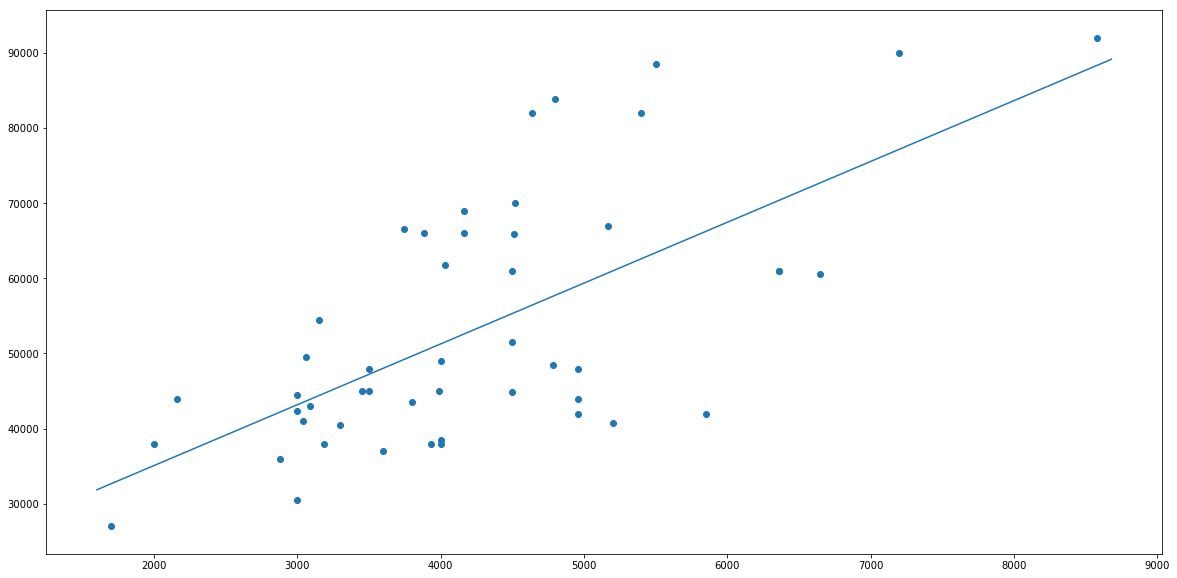

In [15]:
def plotValues(X_col, c, m):
    max_x=np.max(X_col)+100
    min_x=np.min(X_col)-100

    x=np.linspace(min_x,max_x)
    y= c+m*x

    plt.plot(x,y,label="Regeression Line")
    plt.scatter(X_col,Y,label='scatter plot')

    plt.xlabel=('plotsize')
    plt.ylabel=('price')
    
plotValues(X_m, M_b, C_b)


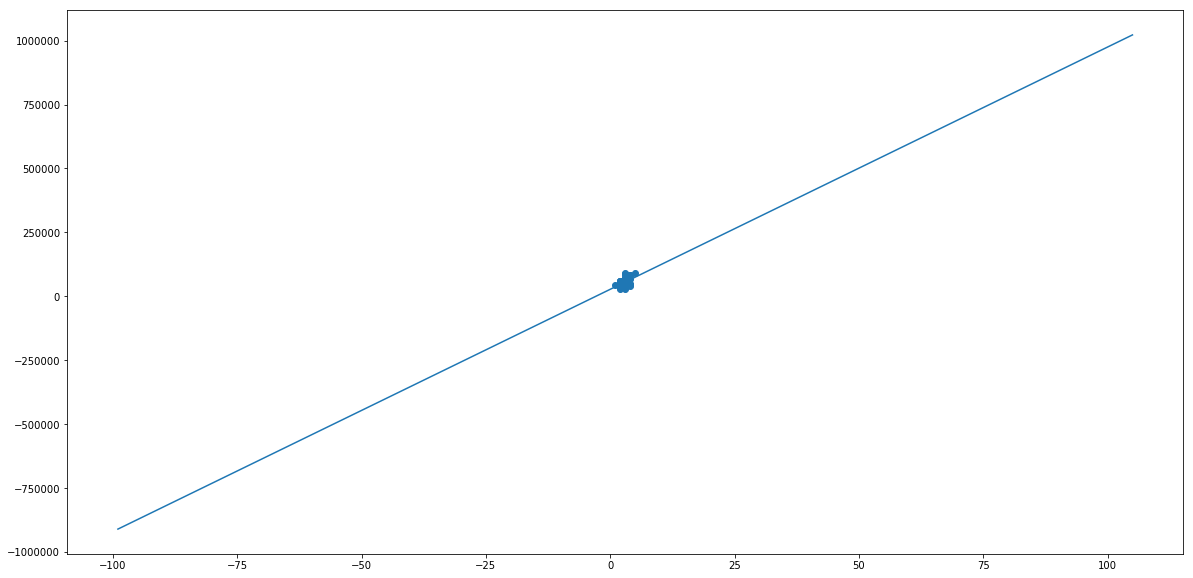

In [19]:
plotValues(X_be, M_be, C_be)


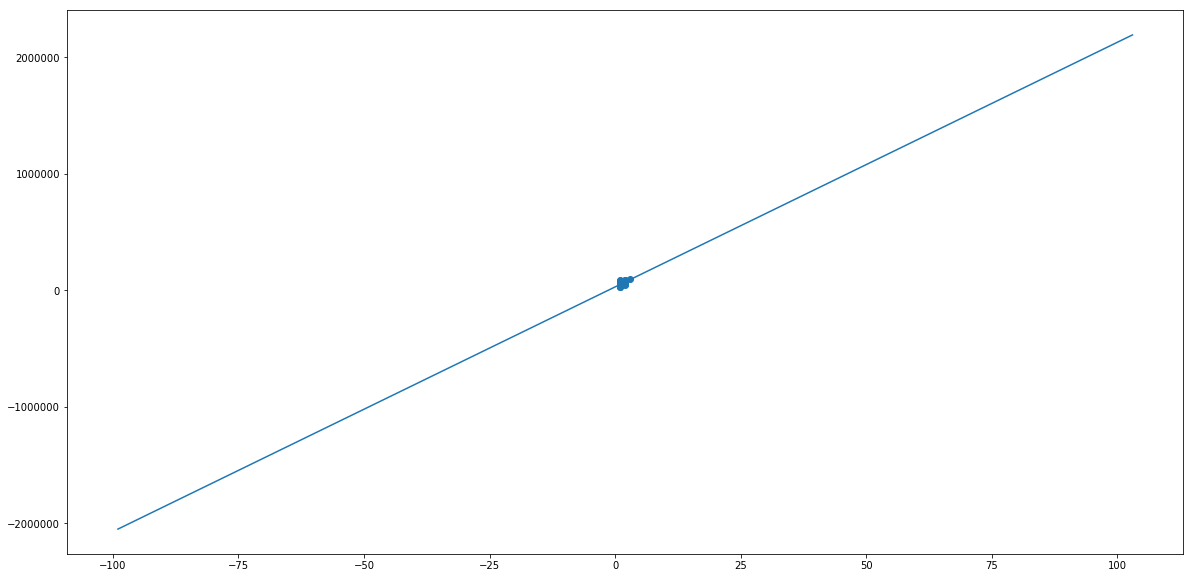

In [20]:
plotValues(X_ba, M_ba, C_ba)


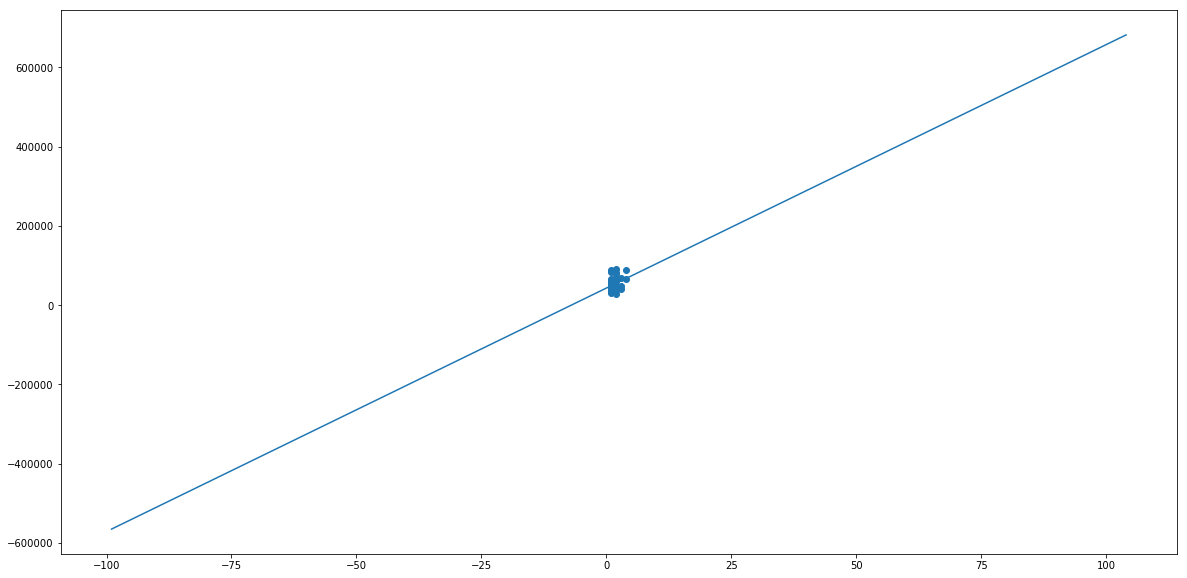

In [21]:
plotValues(X_s, M_s, C_s)

In [26]:
def calculateR2(X_Col, mean_y, c, m):
    ss_t=0 # total sum of square
    ss_r=0 # total sum of square of residuals
    for i in range(size):
        y_pred=(c+m*X_Col[i])
        ss_t += (Y[i]-mean_y) **2
        ss_r += (Y[i]-y_pred)**2
    r2=1-(ss_r/ss_t)
    print(r2)
    
calculateR2(X_m, mean_y_m, M_b , M_b  )
calculateR2(X_ba, mean_y_ba,  M_ba , M_ba )
calculateR2(X_be, mean_y_be,  M_be , M_be )
calculateR2(X_s, mean_y_s,  M_s , M_s )

-26812845.34844242
-0.013968646862874357
-9.662925710123215
-17.121226869565636
